# **Content**

This notebook contains analysis of **Women's Clothing E-Commerce** dataset. Since this is real commercial data, it has been anonymized.

Dataset can be found on the following [address](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)

Table of Contents

- Understanding Database
- Data cleaning & Wrangling
- Data Analysis
- Findings/Suggestions

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing dataset

df = pd.read_csv("../data/Womens Clothing E-Commerce Reviews.csv",
                 sep=",",index_col="Unnamed: 0")

df_backup = df.copy()

### Understanding Database

In [4]:
'''
- There are less than hundred missing values for columns Division Name, Department Name and 
Class Name. Since this percentage is so low compared to whole dataset, I will exclude those
data for further analysis.

- I will exclude ages above 80 from the dataset in order to normalize data.

- Average age in our dataset is 43. Upper quantile is 51, lower quantile is 34.
'''

print(df.describe())
print(f"Null Columns;\n{df.isnull().sum()}")
print("\n")
print(df.info())

        Clothing ID           Age        Rating  Recommended IND  \
count  23486.000000  23486.000000  23486.000000     23486.000000   
mean     918.118709     43.198544      4.196032         0.822362   
std      203.298980     12.279544      1.110031         0.382216   
min        0.000000     18.000000      1.000000         0.000000   
25%      861.000000     34.000000      4.000000         1.000000   
50%      936.000000     41.000000      5.000000         1.000000   
75%     1078.000000     52.000000      5.000000         1.000000   
max     1205.000000     99.000000      5.000000         1.000000   

       Positive Feedback Count  
count             23486.000000  
mean                  2.535936  
std                   5.702202  
min                   0.000000  
25%                   0.000000  
50%                   1.000000  
75%                   3.000000  
max                 122.000000  
Null Columns;
Clothing ID                   0
Age                           0
Title       

### Data Cleaning and Wrangling

In [5]:
# Defining function to remove NaN values

def drop_missing_values(data,column):
    if data[column].isnull().sum() > 0:
        data = data[data[column].isnull() != True]
    else:
        pass
    return data

nan_columns = ["Division Name","Department Name","Class Name"]
for column in nan_columns:
    df = drop_missing_values(df,column)

In [5]:
# Removing records for ages under 18 and over 80.

df = df.drop(df[(df["Age"] > 80) |
                (df["Age"] < 18)].index)

In [6]:
# Creating a new column for binning age

interval = [18,30,40,50,60,70,80]
age_categorized = pd.cut(df["Age"],bins=interval,retbins=False,
                         include_lowest=True,
                         labels=["18-30","30-40","40-50","50-60","60-70","70-80"])
df.insert(2,"Age_Categorized",age_categorized)

### Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Dataset')

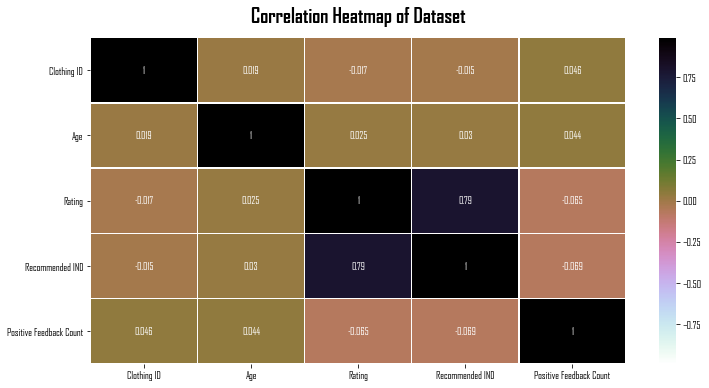

In [7]:
'''
Checking correlations with Heatmap.
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (12,6)

sns.heatmap(data=df.corr(), vmin=-0.99,vmax=0.99,
            annot= True, cbar=True,linewidth=0.5, cmap="cubehelix_r")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Dataset",size=20,fontweight="bold",pad=15)

#### Reviews & Ratings based on Age

Text(0.5, 1.0, 'Reviews per age')

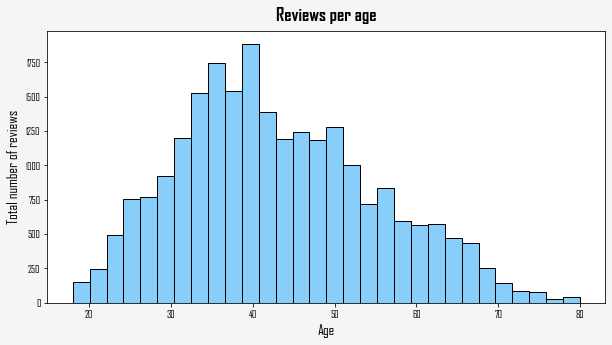

In [8]:
'''
Looking number of reviews per age.
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['figure.facecolor'] = 'whitesmoke'

fig1, ax = plt.subplots(1,1)
ax.hist(df.Age, bins=30,color="lightskyblue",edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Total number of reviews",size=15)
ax.set_title("Reviews per age",size=18,fontweight="bold",pad=10)

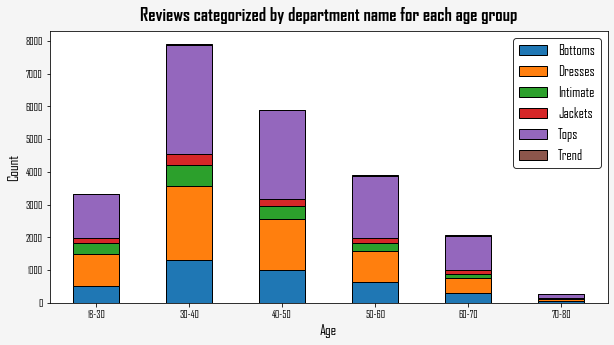

In [9]:
'''
Reviews categorized by dpt name for each age group
'''

fig6 , ax = plt.subplots(1,1)
df.groupby(['Department Name', age_categorized]).size().unstack(0).plot.bar(
    ax=ax,stacked=True,edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Count",size=15)
ax.set_title("Reviews categorized by department name for each age group",size=18,
                fontweight="bold",pad=10)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
ax.legend(edgecolor="k",prop={"size":14})

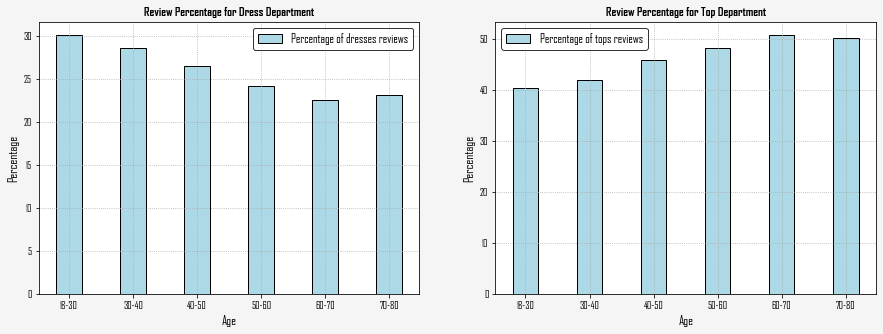

In [28]:
'''
Checking percentage of reviews for Dresses and Tops based on age
'''

reviews_percentage=[]
reviews_percentage_dresses = []
reviews_percentage_tops = []
labels=["18-30","30-40","40-50","50-60","60-70","70-80"]
departments = ["Dresses","Tops"]
def ratio_calculator_review_perc_by_dpt(data):
    for i in range(0,len(labels)):
        reviews_percentage_dresses.append((len(data[(data["Age_Categorized"] == labels[i]) &
                                            (data["Department Name"] == "Dresses")]) /
                                   (len(data[(data["Age_Categorized"] == labels[i])])))*100)
        reviews_percentage_tops.append((len(data[(data["Age_Categorized"] == labels[i]) &
                                            (data["Department Name"] == "Tops")]) /
                                   (len(data[(data["Age_Categorized"] == labels[i])])))*100)        
        for j in range(0,len(departments)):
            reviews_percentage.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                                         (data["Department Name"] == departments[j])]) / 
                                (len(data[(data["Age_Categorized"] == labels[i])])))*100)

# Setting height of the bar charts.

idx=[]
idx= [i for i in labels]
for i in range(0,11,2):
    idx.insert(i,labels[int(i/2)])
wo_category = list(zip(idx, reviews_percentage))
wc = list(zip(idx, departments*6))
with_category = list(zip(wc,reviews_percentage))

# Applying ratio_calculator_review_perc_by_dpt function to dataset
ratio_calculator_review_perc_by_dpt(df)

# Visualizing
fig11 ,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(x=labels,height=reviews_percentage_dresses,
          width=0.4,label="Percentage of dresses reviews",color="lightblue",edgecolor="k")
ax[0].legend(edgecolor="k",prop={"size":12})
ax[0].set_xlabel("Age",size=13)
ax[0].set_ylabel("Percentage",size=13)
ax[0].set_title("Review Percentage for Dress Department",fontweight="bold")
ax[0].grid(True,c="darkgray",ls=":")

ax[1].bar(x=labels,height=reviews_percentage_tops,
          width=0.4,label="Percentage of tops reviews",color="lightblue",edgecolor="k")
ax[1].legend(edgecolor="k",prop={"size":12})
ax[1].set_xlabel("Age",size=13)
ax[1].set_ylabel("Percentage",size=13)
ax[1].set_title("Review Percentage for Top Department",fontweight="bold")
ax[1].grid(True,c="darkgray",ls=":")

Text(0.5, 1.0, 'Percentage of reviews for Dresses department')

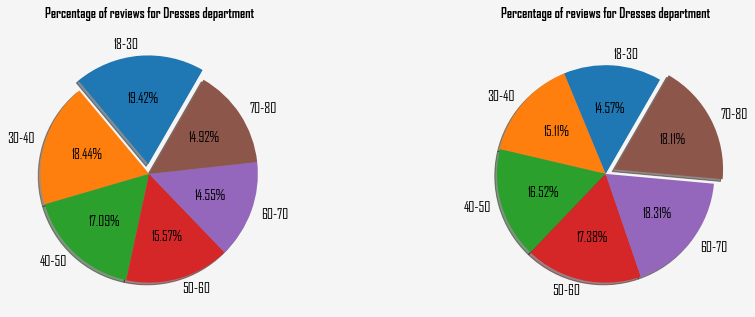

In [11]:
'''
Above plot with pie chart, but I'll go with bar chart since it's easier to compare outputs in that one.
'''

fig12 ,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].pie(reviews_percentage_dresses,labels=labels,
          autopct='%1.2f%%',textprops={'fontsize': 14},startangle=60,
          shadow=True,explode=(0.09,0,0,0,0,0))
ax[0].set_title("Percentage of reviews for Dresses department",size=13,fontweight="bold",pad=20)

ax[1].pie(reviews_percentage_tops,labels=labels,
          autopct='%1.2f%%',textprops={'fontsize': 14},startangle=60,
          shadow=True,explode=(0,0,0,0,0,0.09))
ax[1].set_title("Percentage of reviews for Dresses department",size=13,fontweight="bold",pad=20)

Text(0.5, 1.0, 'Distribution of ratings per age')

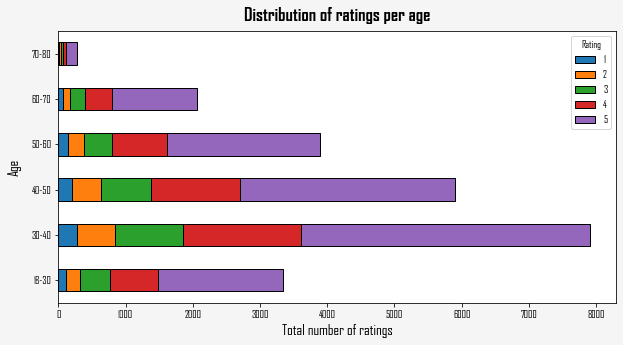

In [13]:
'''
Looking distribution of ratings per age group.
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
df.groupby(['Rating', age_categorized]).size().unstack(0).plot.barh(
    ax=ax2,stacked=True,edgecolor="k")
ax2.set_xlabel("Total number of ratings",size=15)
ax2.set_ylabel("Age",size=15,labelpad=10)
ax2.set_title("Distribution of ratings per age",size=18,fontweight="bold",pad=10)

Text(0.5, 1.0, 'Distribtuion of Ratings per Age')

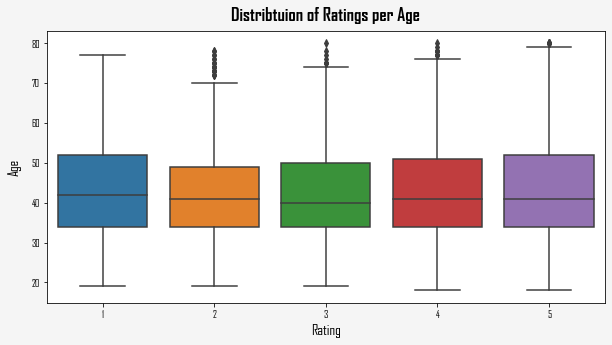

In [14]:
'''
Distribution of Ratings per Age - Boxplot
'''

fig3, ax3 = plt.subplots(1,1)
sns.boxplot(data=df,x="Rating",y="Age"),
plt.xlabel("Rating",size=15)
plt.ylabel("Age",size=15,labelpad=10)
plt.yticks(rotation=360)
plt.title("Distribtuion of Ratings per Age",size=18,fontweight="bold",pad=10)

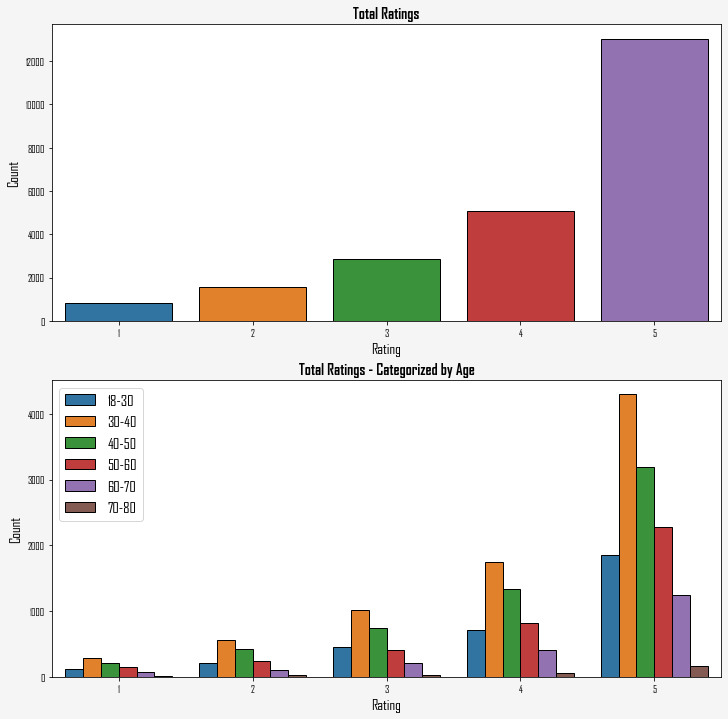

In [15]:
'''
Investigating number of ratings in the dataset
'''

fig4 , ax4 = plt.subplots(2,1,figsize=(12,12))
sns.countplot(data=df,x="Rating",ax=ax4[0],edgecolor="k")
ax4[0].set_title("Total Ratings",size=15,fontweight="bold")
ax4[0].set_ylabel("Count",size=15)
ax4[0].set_xlabel("Rating",size=15)
sns.countplot(data=df,x="Rating",hue="Age_Categorized",ax=ax4[1],edgecolor="k")
ax4[1].set_title("Total Ratings - Categorized by Age",size=15,fontweight="bold")
ax4[1].set_ylabel("Count",size=15)
ax4[1].set_xlabel("Rating",size=15)
ax4[1].legend(prop={"size":15})

In [16]:
'''
Checking percentages of 5 ratings and 1 ratings for people in the interval of 30-40 and 40-50 
since they are the most involved group in ratings.
'''

five_ratio_list = []
one_ratio_list = []
labels=["18-30","30-40","40-50","50-60","60-70","70-80"]
def ratio_calculator_rating(data):
    for i in range(0,len(labels)):
        five_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                                         (data["Rating"] == 5)]) / 
                                (len(data[(data["Age_Categorized"] == labels[i])])))*100)
    for i in range(0,len(labels)):
        one_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                                        (data["Rating"] == 1)]) / 
                               (len(data[(data["Age_Categorized"] == labels[i])])))*100)

ratio_calculator_rating(df)
list_of_five = list(zip(five_ratio_list, labels))
list_of_one = list(zip(one_ratio_list, labels))
print("5 star percentages")
print('\n'.join(map(str, list_of_five)))
print("\n")
print("1 star percentages")
print('\n'.join(map(str, list_of_one)))

5 star percentages
(55.63549160671462, '18-30')
(54.338477105995445, '30-40')
(54.14196171438251, '40-50')
(58.61182519280206, '50-60')
(60.865337870685465, '60-70')
(58.00711743772242, '70-80')


1 star percentages
(3.41726618705036, '18-30')
(3.5416139640779156, '30-40')
(3.5405725902083685, '40-50')
(3.8303341902313623, '50-60')
(3.6460865337870683, '60-70')
(3.9145907473309607, '70-80')


<ipython-input-17-806708ed5876>:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(grid[1,:]).set_title("Reviews for each class",size=18,fontweight="bold",pad=10)


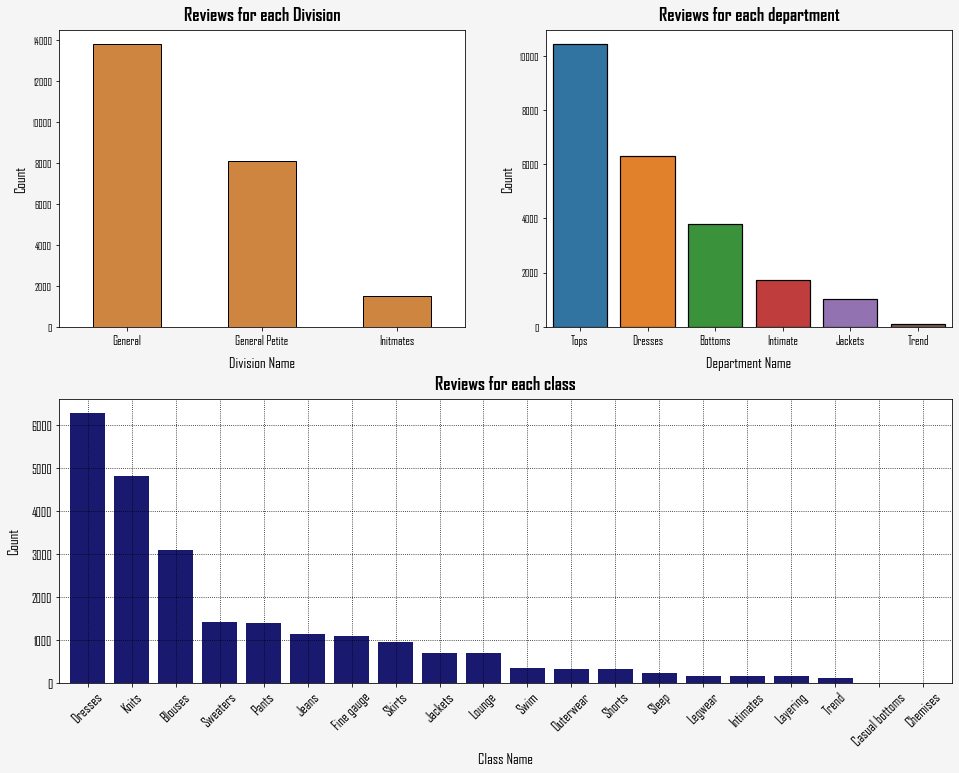

In [17]:
'''
Looking departments for each age group
'''

fig5 , ax = plt.subplots(2,2,figsize=(16,12))
df["Division Name"].value_counts().plot(kind="bar",width=0.5,edgecolor="k",
                                        color="peru",ax=ax[0,0])
ax[0,0].set_xlabel("Division Name",size=15,labelpad=10)
ax[0,0].set_ylabel("Count",size=15)
ax[0,0].set_title("Reviews for each Division",size=18,
                fontweight="bold",pad=10)
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=0,size=12)


count_each_dpt = pd.pivot_table(df,values=["Class Name"],columns=[
    "Department Name"],aggfunc="count").T.sort_values(by="Class Name",ascending=False)
ax[0,1] = sns.barplot(data=count_each_dpt.reset_index(), x ="Department Name",
                    y="Class Name",edgecolor="k",linewidth=1.2,ax=ax[0,1])
ax[0,1].set_xlabel("Department Name",size=15,labelpad=10)
ax[0,1].set_ylabel("Count",size=15)
ax[0,1].set_title("Reviews for each department",size=18,fontweight="bold",pad=10)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=0,size=12)


grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[1,:])
df["Class Name"].value_counts().plot(kind="bar",width=0.8,color="midnightblue")
plt.xlabel("Class Name",size=15)
plt.ylabel("Count",size=15,labelpad=10)
plt.subplot(grid[1,:]).set_title("Reviews for each class",size=18,fontweight="bold",pad=10)
plt.xticks(size=14,rotation=45)
plt.yticks(size=12)
plt.grid(True,c="k",linestyle=":")

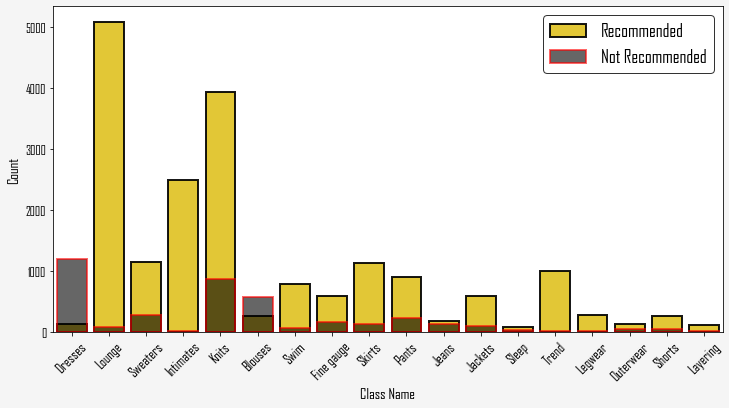

In [18]:
'''
Looking recommendations for each division/department/class
'''

fig10 , ax = plt.subplots(1,1,figsize=(12,6))

df_rec = df[df["Recommended IND"]==1]
df_not_rec = df[df["Recommended IND"]==0]

sns.countplot(data=df_rec,x="Class Name",edgecolor="k",
              color="gold",alpha=0.9,linewidth=2,label="Recommended")
sns.countplot(data=df_not_rec,x="Class Name",edgecolor="red",
              color="k",alpha=0.6,linewidth=2,label="Not Recommended")
plt.xlabel("Class Name",size=15,fontweight=525)
plt.xticks(size=14,rotation=45)
plt.ylabel("Count",size=15,fontweight=525)
plt.yticks(size=12)
plt.legend(edgecolor="k",prop={"size":18})

# **Findings**

## Analysis of Reviews

#### Findings 1
<br>
<li> People in the age rage between 30 and 50 are the most active group in <b>reviewing</b> products.</li>


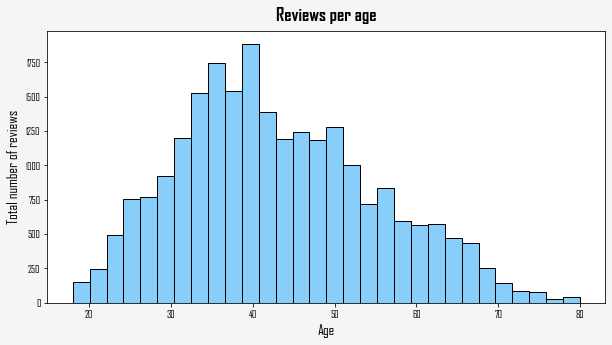

In [19]:
fig1

#### Findings 2

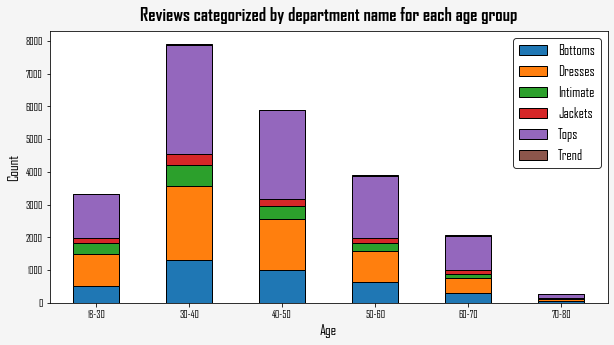

In [20]:
fig6


    
While we see people in the above figure that age interval 30 and 40 has higher percentage of reviews on dresses, reviews on dresses category decreases with the increasement of the age. Following results (below) have been derived from calculating each bar areas above;

<ol>    
<li>The older the people become, the lower the interest they show to Dresses department. </li><br>
<li>The older the people become, the higher the interest they show to Tops department.</li>
</ol>

Apparently, young people's favourite category is dresses, whereas the older they get, their interest shift towards to tops from dresses.

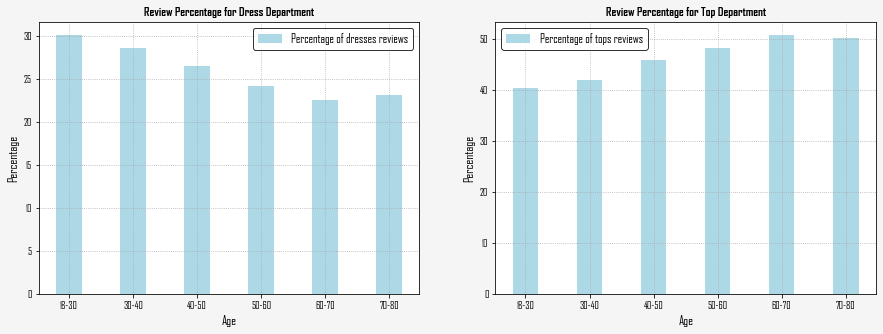

In [21]:
fig11

## Analysis of Ratings

#### Findings 3

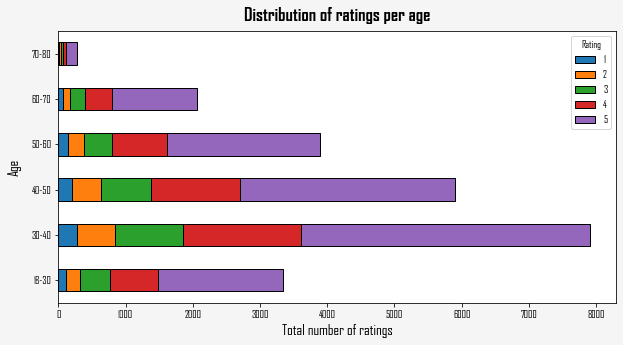

In [22]:
fig2

<ol>
<li>People over the 70s do not involve much in rating the products.</li><br>
<li>People in range between 30-50 are again the most active group in <b>rating</b> products.<br> I am predicting that people over 70s have much less internet usage compared to others, so less ratings in this category makes sense.</li>
</ol>

#### Findings 4

Below graph shows us total ratings in the dataset.

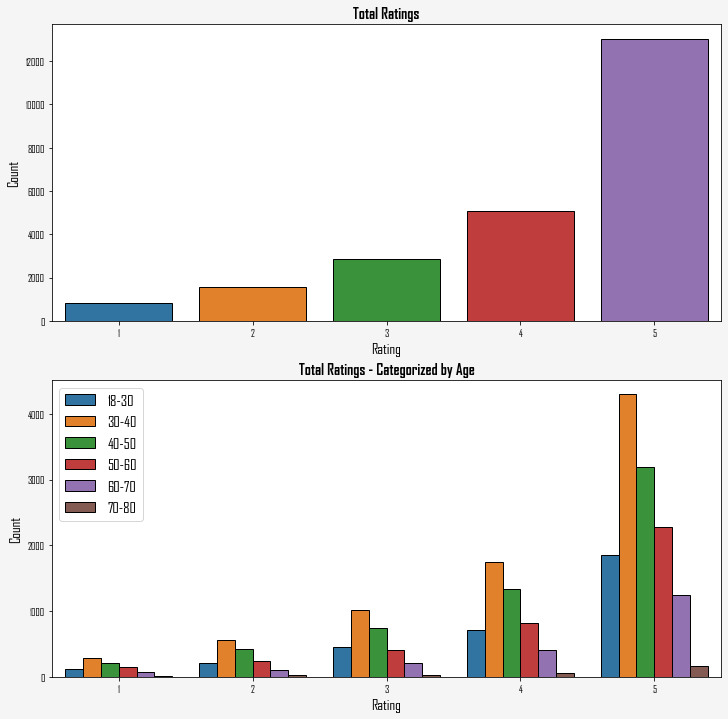

In [23]:
fig4

Even though majority of customers look satisfied by looking given ratings, companies still needs to work
hard to make it better. 

In the following section we will go deeper and understand which departments are doing good and which are doing bad based on rating results.

#### Findings 5

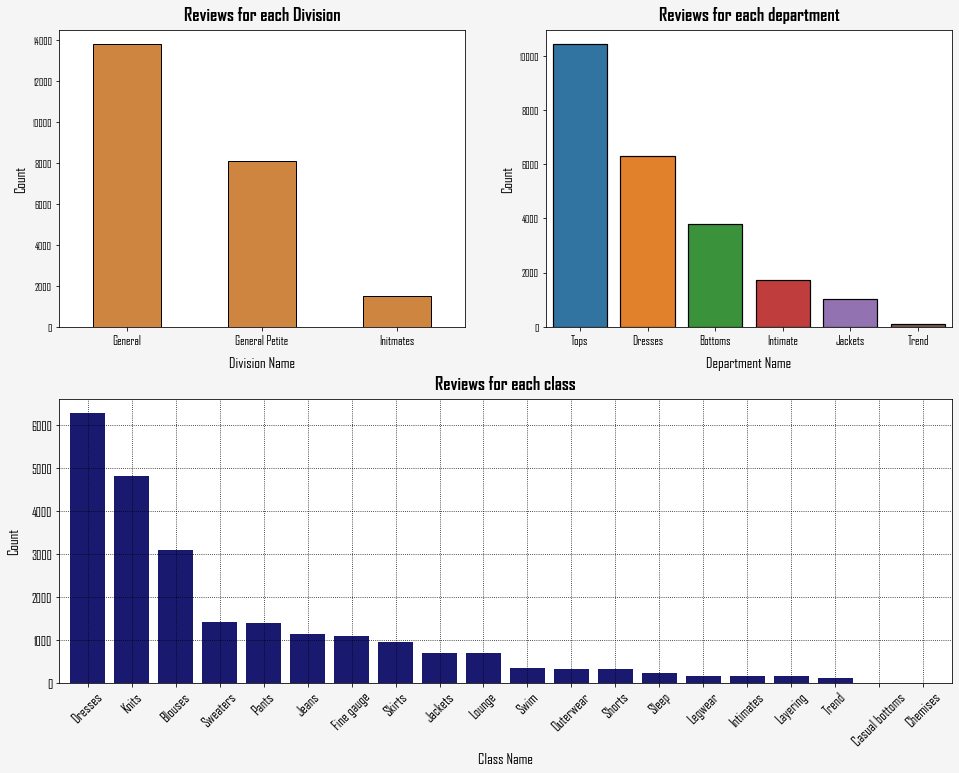

In [24]:
fig5

<ol> 
<li>Tops department has the highest number of reviews which leads that Tops department has the highest
review proportion compared to others. </li><br>

<li>Dresses department has the second highest reviews proportion after tops department. 
It is followed by Bottoms. </li>
</ol>

##### Suggestion

<li>Apparently, customers like Tops department the most, this department has to be investigated 
further and findings have to be applied to other departments in order to leverage sales. </li>

#### Findings 6

In [25]:
print("5 star percentages")
print('\n'.join(map(str, list_of_five)))
print("\n")
print("1 star percentages")
print('\n'.join(map(str, list_of_one)))

5 star percentages
(55.63549160671462, '18-30')
(54.338477105995445, '30-40')
(54.14196171438251, '40-50')
(58.61182519280206, '50-60')
(60.865337870685465, '60-70')
(58.00711743772242, '70-80')


1 star percentages
(3.41726618705036, '18-30')
(3.5416139640779156, '30-40')
(3.5405725902083685, '40-50')
(3.8303341902313623, '50-60')
(3.6460865337870683, '60-70')
(3.9145907473309607, '70-80')


<li>People in age between 60-70 have the highest percentage of giving 5 stars with percentage of 60.86%</li>

<li>People in age between 40-50 have the lowest percentage of giving 5 stars with percentage of 54.14%</li>

In the dataset, there are twice as many data available for the age interval 40-50 rather than 60-70.
My expectation is that if there'd be more sample to analyse age interval 60-70 the percentage would 
become smaller. Since there's less data available for 60-70 age, the ratio calculation is quite
sensitive, therefore I will not rely this outcome 100%. This needs to be investigated further. 
<br>
<br>
<li>People in age between 70-80 have the highest percentage of giving 1 stars with percentage of 3.91%</li>
<li>People in age between 40-50 have the lowest percentage of giving 1 stars with percentage of 3.41%</li>

1 star results also have the same problem since very small percentage of data consists of people in
age interval 70-80. Even few negative ratings can change this percentage hugely since ratio will be
much more sensitive in small datasets. Therefore, this also needs to be investigated further. More 
data can be collected from people in range 70-80 in order to interpret those results reliably.

## Analysis of Divison/Class/Departments' Recommendations

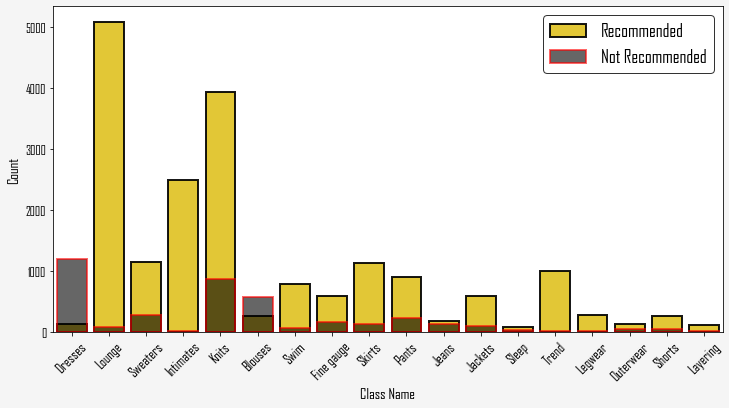

In [26]:
fig10

Above graph shows us each class name and whether they are recommended buy customer or not.

##### Suggestion

<ol>
<li>Dresses,blouses and jeans classes need urgent care.</li><br>
<li>Loung and intimates classes have quite good recommendations. Needs to investigated further to 
understand reason of it - and apply it to other classes.</li>
</ol>

                           Gorkem Guneser - 23/09/2020 - Amsterdam/ The Netherlands